In [1]:
import sys
import glob

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [86]:
def analyse(file_pattern, title=None, noreset=False):
    dfs = []
    for f in glob.glob(f"../results/{file_pattern}"):
        print(f)
        df = pd.read_csv(f)  
        if not "m" in df.columns:
            m = int(f.split("/")[-1].split("-")[4][1:])
            df["m"] = m
        dfs.append(df)    
    
    df = pd.concat(dfs)

    if noreset:
        # since we don't re-use data, need to replace m with a cumulative total of datapoints seen
        p_to_m = df.groupby("p").m.first().cumsum()
        df["m"] = df["p"].apply(lambda p: p_to_m[p])
    
    mean_win = df.groupby(["acquire_pairs_function", "m"]).win.mean().unstack()
    std = df.groupby(["acquire_pairs_function", "m", "seed"]).win.mean().groupby(["acquire_pairs_function", "m"]).std().unstack()
    n = df.groupby(["acquire_pairs_function", "m", "seed"]).win.mean().groupby(["acquire_pairs_function", "m"]).count().unstack()
    c = df.groupby(["acquire_pairs_function", "m"]).win.count().unstack() / n
    stderr = std / (n**0.5)

    if title is not None:
        print("=========================================")
        print(f" {title}") 
        print("=========================================")
    
    print("============= WIN RATE ============")
    display(mean_win)
    print("============= STD ERR ============")
    display(stderr)
    print("============= NUM SEEDS ============")
    display(n)
    print("============= EVAL DATAPOINTS PER SEED ============")
    display(c)
    
    colors = matplotlib.colormaps["Set1"]
    fig, ax = plt.subplots(figsize=(10, 8))
    
    mean_win_per_seed = df.groupby(["acquire_pairs_function", "m", "seed"]).win.mean().reset_index()
    
    for i, apf in enumerate(sorted(set(df["acquire_pairs_function"]))):
        data = mean_win_per_seed[mean_win_per_seed.acquire_pairs_function == apf]
        ax.scatter(data["m"], data["win"], color=colors(i), marker="x", alpha=0.5, s=8)
        line_data = pd.DataFrame(data.groupby("m").win.mean())
        line_data["std"] = data.groupby("m").win.std()
        line_data["stderr"] = line_data["std"] / data.groupby("m").win.count()**0.5 
        line_data = line_data.reset_index()
            
        ax.errorbar(line_data["m"], line_data["win"], yerr=line_data["stderr"], capsize=5, c=colors(i), label=apf)
        #display(line_data)
    
    ax.legend();

../results/post-eval-winrate-imdb-m128-xmas-sweep2.csv
../results/post-eval-winrate-imdb-m256-xmas-sweep2.csv
../results/post-eval-winrate-imdb-m512-xmas-sweep2.csv
../results/post-eval-winrate-imdb-m768-xmas-sweep2.csv
 IMDB - Adam, 50 epochs per training cycle, beta=0.2, lr=1e-6, win-rate vs refmodel
============= WIN RATE ============


m,128,256,512,768
acquire_pairs_function,,,,
CERTAINTY,0.675781,0.816189,0.874783,0.901042
HIGH_ENTROPY_AND_CERTAINTY,0.680990,0.812174,0.894097,0.915473
RANDOM,0.670464,0.760525,0.845703,0.882161


============= STD ERR ============


m,128,256,512,768
acquire_pairs_function,,,,
CERTAINTY,0.003148,0.004786,0.007216,0.003521
HIGH_ENTROPY_AND_CERTAINTY,0.003930,0.007491,0.006302,0.005371
RANDOM,0.011509,0.008925,0.004939,0.004238


============= NUM SEEDS ============


m,128,256,512,768
acquire_pairs_function,,,,
CERTAINTY,9,9,9,9
HIGH_ENTROPY_AND_CERTAINTY,9,9,9,9
RANDOM,9,9,9,9


============= EVAL DATAPOINTS PER SEED ============


m,128,256,512,768
acquire_pairs_function,,,,
CERTAINTY,1024.0,1024.0,1024.0,1024.0
HIGH_ENTROPY_AND_CERTAINTY,1024.0,1024.0,1024.0,1024.0
RANDOM,1024.0,1024.0,1024.0,1024.0


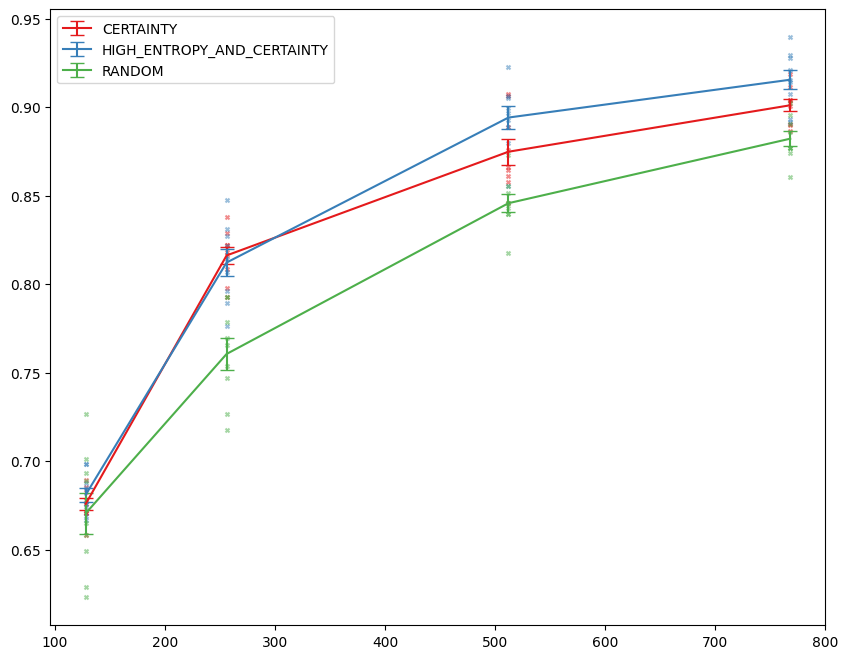

In [87]:
# e.g. https://wandb.ai/bbnn/wm-debug-imdb/runs/osn0g4rp/
analyse("post-eval-winrate-imdb-m*-xmas-sweep2.csv", "IMDB - Adam, 50 epochs per training cycle, beta=0.2, lr=1e-6, win-rate vs refmodel")

../results/post-eval-winrate-tldr-m512-xmas-sweep2.csv
../results/post-eval-winrate-tldr-m0-xmas-sweep2.csv
../results/post-eval-winrate-tldr-m384-xmas-sweep2.csv
../results/post-eval-winrate-tldr-m256-xmas-sweep2.csv
../results/post-eval-winrate-tldr-m128-xmas-sweep2.csv
 TLDR - Adam, 70 epochs per training phase, beta=0.2, lr=1e-6, win-rate vs human
============= WIN RATE ============


m,0,128,256,384,512
acquire_pairs_function,,,,,
CERTAINTY,NaN,0.523763,0.561849,0.584744,0.600369
HIGH_ENTROPY_AND_CERTAINTY,NaN,0.528537,0.546224,0.592665,0.592339
RANDOM,0.394206,0.510200,0.550998,0.550564,0.560764


============= STD ERR ============


m,0,128,256,384,512
acquire_pairs_function,,,,,
CERTAINTY,NaN,0.011730,0.011786,0.009947,0.008984
HIGH_ENTROPY_AND_CERTAINTY,NaN,0.005567,0.009509,0.006927,0.009559
RANDOM,0.002966,0.007517,0.010700,0.008515,0.010705


============= NUM SEEDS ============


m,0,128,256,384,512
acquire_pairs_function,,,,,
CERTAINTY,NaN,9.0,9.0,9.0,9.0
HIGH_ENTROPY_AND_CERTAINTY,NaN,9.0,9.0,9.0,9.0
RANDOM,9.0,9.0,9.0,9.0,9.0


============= EVAL DATAPOINTS PER SEED ============


m,0,128,256,384,512
acquire_pairs_function,,,,,
CERTAINTY,NaN,1024.0,1024.0,1024.0,1024.0
HIGH_ENTROPY_AND_CERTAINTY,NaN,1024.0,1024.0,1024.0,1024.0
RANDOM,1024.0,1024.0,1024.0,1024.0,1024.0


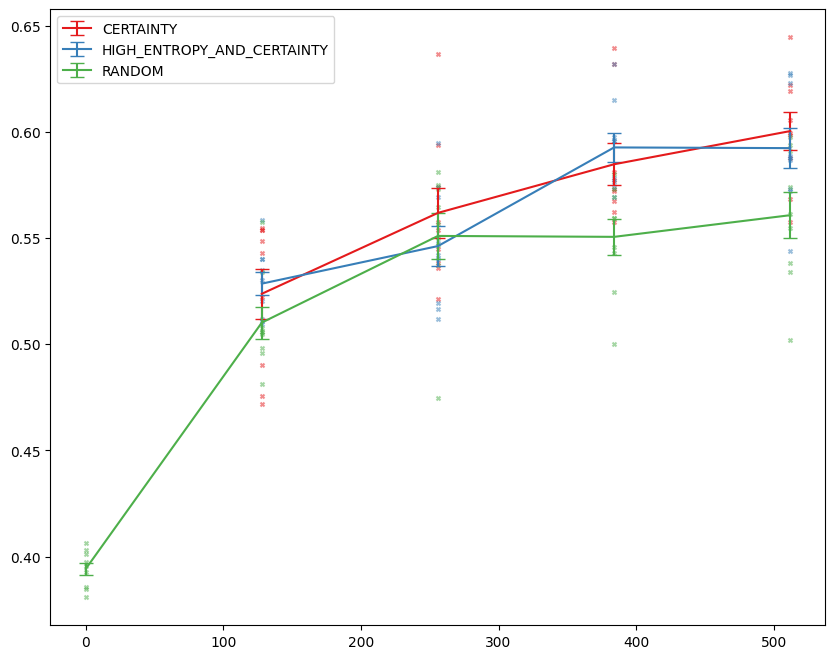

In [88]:
# https://wandb.ai/bbnn/wm-debug-tldr/runs/260q0dnn e.g.
analyse("post-eval-winrate-tldr-m*-xmas-sweep2.csv", "TLDR - Adam, 70 epochs per training phase, beta=0.2, lr=1e-6, win-rate vs human")

../results/post-eval-winrate-imdb-m128-phase5-xmas-noreset1.csv
../results/post-eval-winrate-imdb-m128-phase3-xmas-noreset1.csv
../results/post-eval-winrate-imdb-m128-phase0-xmas-noreset1.csv
../results/post-eval-winrate-imdb-m128-phase2-xmas-noreset1.csv
../results/post-eval-winrate-imdb-m128-phase1-xmas-noreset1.csv
../results/post-eval-winrate-imdb-m128-phase4-xmas-noreset1.csv
 Online IMDB, noreset/re-acquire all data, 50 epochs per training phase, beta=0.2, lr=1e-6
============= WIN RATE ============


m,128,256,384,512,640,768
acquire_pairs_function,,,,,,
CERTAINTY,0.6875,0.840234,0.896875,0.918750,0.935937,0.947266
RANDOM,0.6750,0.780469,0.844922,0.898438,0.914453,0.926172


============= STD ERR ============


m,128,256,384,512,640,768
acquire_pairs_function,,,,,,
CERTAINTY,0.014179,0.016039,0.011935,0.007324,0.009516,0.006536
RANDOM,0.009027,0.008813,0.007350,0.013532,0.004760,0.005640


============= NUM SEEDS ============


m,128,256,384,512,640,768
acquire_pairs_function,,,,,,
CERTAINTY,5,5,5,5,5,5
RANDOM,5,5,5,5,5,5


============= EVAL DATAPOINTS PER SEED ============


m,128,256,384,512,640,768
acquire_pairs_function,,,,,,
CERTAINTY,512.0,512.0,512.0,512.0,512.0,512.0
RANDOM,512.0,512.0,512.0,512.0,512.0,512.0


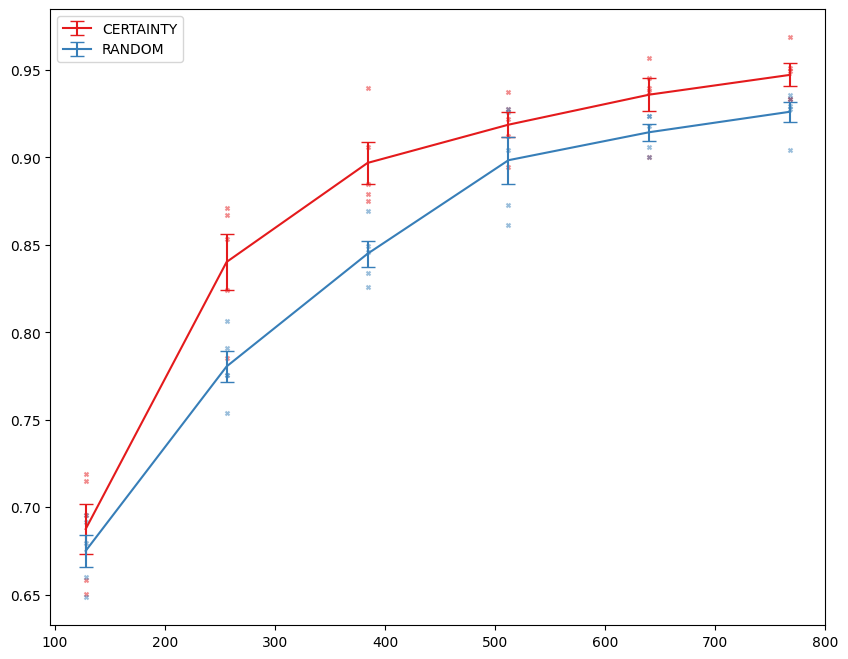

In [89]:
# e.g. https://wandb.ai/bbnn/wm-debug-imdb/runs/l6p270mj/
analyse("*imdb*xmas-noreset1*", "Online IMDB, noreset/re-acquire all data, 50 epochs per training phase, beta=0.2, lr=1e-6", True)

../results/post-eval-winrate-tldr-m128-phase2-xmas-noreset2.csv.1706310109.0659816
../results/post-eval-winrate-tldr-m128-phase2-xmas-noreset2.csv.1706303078.7437146
../results/post-eval-winrate-tldr-m128-phase1-xmas-noreset2.csv.1706310224.5288434
../results/post-eval-winrate-tldr-m128-phase1-xmas-noreset2.csv
../results/post-eval-winrate-tldr-m128-phase4-xmas-noreset2.csv.1706302866.8477116
../results/post-eval-winrate-tldr-m128-phase1-xmas-noreset2.csv.1706303187.5196605
../results/post-eval-winrate-tldr-m128-phase3-xmas-noreset2.csv
../results/post-eval-winrate-tldr-m128-phase2-xmas-noreset2.csv
../results/post-eval-winrate-tldr-m128-phase5-xmas-noreset2.csv
../results/post-eval-winrate-tldr-m128-phase5-xmas-noreset2.csv.1706309677.7472086
../results/post-eval-winrate-tldr-m128-phase4-xmas-noreset2.csv
../results/post-eval-winrate-tldr-m128-phase3-xmas-noreset2.csv.1706309980.9898155
../results/post-eval-winrate-tldr-m128-phase3-xmas-noreset2.csv.1706302963.262837
../results/post-e

m,128,256,384,512,640
acquire_pairs_function,,,,,
CERTAINTY,0.457813,0.509375,0.509375,0.554688,0.506250
RANDOM,0.445312,0.482812,0.521875,0.492188,0.501563


============= STD ERR ============


m,128,256,384,512,640
acquire_pairs_function,,,,,
CERTAINTY,0.011745,0.013396,0.014699,0.019918,0.012204
RANDOM,0.024206,0.015507,0.030798,0.020963,0.046312


============= NUM SEEDS ============


m,128,256,384,512,640
acquire_pairs_function,,,,,
CERTAINTY,5,5,5,5,5
RANDOM,5,5,5,5,5


============= EVAL DATAPOINTS PER SEED ============


m,128,256,384,512,640
acquire_pairs_function,,,,,
CERTAINTY,128.0,128.0,128.0,128.0,128.0
RANDOM,128.0,128.0,128.0,128.0,128.0


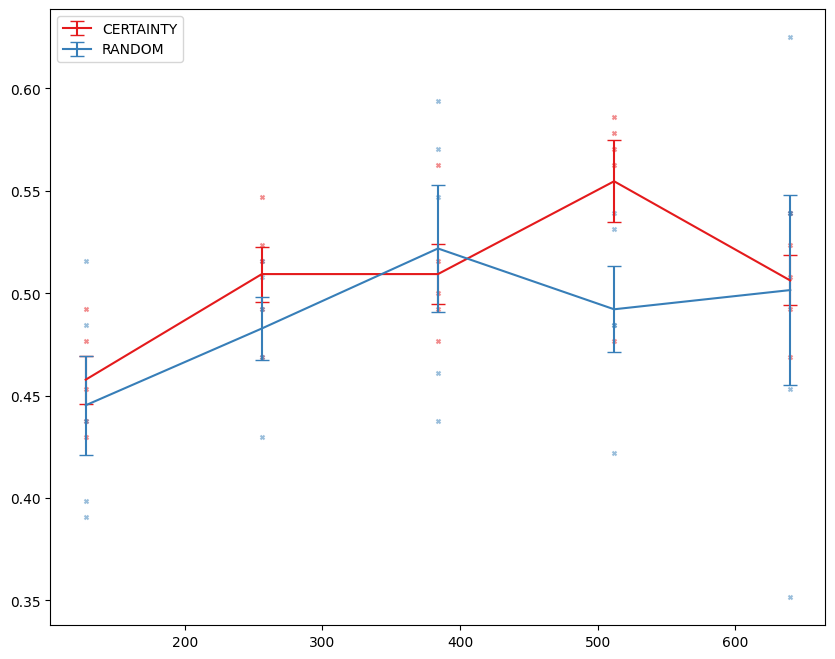

In [97]:
# This one's a work in progress....

# e.g. https://wandb.ai/bbnn/wm-debug-tldr/runs/z4fll7l5
analyse("*tldr*noreset2*", "Online TLDR, noreset/re-acquire all data, 10 epochs per training phase, beta=0.2, lr=1e-6", True)

../results/post-eval-winrate-tldr-m128-phase1-xmas-noreset3.csv.1706344427.80907
../results/post-eval-winrate-tldr-m128-phase4-xmas-noreset3.csv.1706356747.2697
../results/post-eval-winrate-tldr-m128-phase5-xmas-noreset3.csv.1706345812.9455686
../results/post-eval-winrate-tldr-m128-phase4-xmas-noreset3.csv.1706345481.3434684
../results/post-eval-winrate-tldr-m128-phase2-xmas-noreset3.csv.1706355981.50996
../results/post-eval-winrate-tldr-m128-phase6-xmas-noreset3.csv
../results/post-eval-winrate-tldr-m128-phase3-xmas-noreset3.csv
../results/post-eval-winrate-tldr-m128-phase2-xmas-noreset3.csv.1706344776.1820896
../results/post-eval-winrate-tldr-m128-phase5-xmas-noreset3.csv.1706343508.755793
../results/post-eval-winrate-tldr-m128-phase2-xmas-noreset3.csv
../results/post-eval-winrate-tldr-m128-phase3-xmas-noreset3.csv.1706345145.1476648
../results/post-eval-winrate-tldr-m128-phase6-xmas-noreset3.csv.1706346162.2465415
../results/post-eval-winrate-tldr-m128-phase4-xmas-noreset3.csv
../re

m,128,256,384,512,640,768
acquire_pairs_function,,,,,,
CERTAINTY,0.435937,0.487109,0.496875,0.511719,0.535156,0.530469
RANDOM,0.480859,0.488281,0.510938,0.539062,0.501953,0.513281


============= STD ERR ============


m,128,256,384,512,640,768
acquire_pairs_function,,,,,,
CERTAINTY,0.021717,0.007948,0.013568,0.015539,0.011169,0.016786
RANDOM,0.008589,0.015662,0.012831,0.021810,0.018249,0.013705


============= NUM SEEDS ============


m,128,256,384,512,640,768
acquire_pairs_function,,,,,,
CERTAINTY,5,5,5,5,5,5
RANDOM,5,5,5,5,5,5


============= EVAL DATAPOINTS PER SEED ============


m,128,256,384,512,640,768
acquire_pairs_function,,,,,,
CERTAINTY,512.0,512.0,512.0,512.0,512.0,512.0
RANDOM,512.0,512.0,512.0,512.0,512.0,512.0


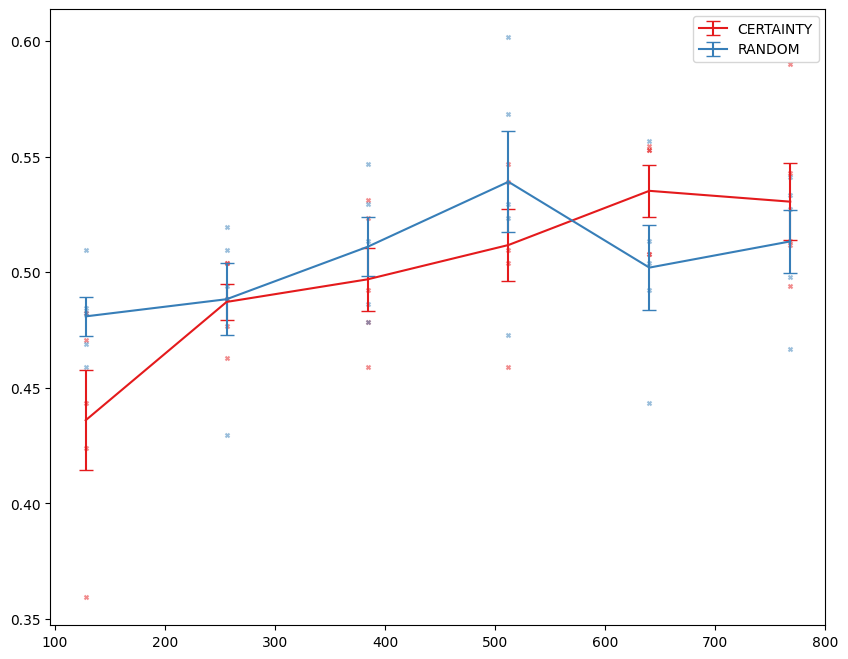

In [99]:
# e.g. https://wandb.ai/bbnn/wm-debug-tldr/runs/gzpemnus
analyse("*tldr*noreset3.csv*", "Online TLDR, noreset/re-acquire all data, 50 epochs per training phase, beta=1.0, lr=1e-6", True)